## Транспортные потоки с Годуновым

In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

from matplotlib import animation
from IPython.display import HTML

In [2]:
def get_flux(u_max, rho_max,rho):
    return u_max*rho*(1-rho/rho_max)

def Jac(u_max, rho_max,rho):
    return u_max*(1-2*rho/rho_max)

def rho_green_light(nx, rho_light):
    
    rho = numpy.arange(nx)*2./nx*rho_light
    rho[int((nx-1)/2):] = 0
    
    return rho

def rho_red_light(nx, rho_max, rho_in):
    
    rho = rho_max*numpy.ones(nx)
    rho[:int((nx-1)*3/4)] = rho_in
    
    return rho

In [3]:
def godunov_traffic(u_max, rho_max, rho_l, rho_r):
    u_l = Jac(u_max, rho_max, rho_l)
    u_r = Jac(u_max, rho_max, rho_r)
    
    if (u_l >= u_r):
        s = u_max*(1-(rho_r+rho_l)/rho_max)
        if s>0:
            rho_star = rho_l
        else:
            rho_star = rho_r
    else:
        if u_l >= 0:
            rho_star = rho_l
        if u_r < 0:
            rho_star = rho_r
        if (u_l < 0 and u_r > 0):
            rho_star = rho_max/2
    return get_flux(u_max, rho_max, rho_star)

def godunov(rho, nt, dt, dx, rho_max, u_max):
    rho_n = numpy.zeros((nt, len(rho)))
    rho_n[0, :] = rho.copy()
    for t in range(1, nt):
        flux = numpy.zeros_like(rho)
        for i in range(len(rho)-1):
            flux[i] = godunov_traffic(u_max, rho_max, rho[i], rho[i+1])
        rho_n[t, 1:] = rho[1:] - sigma*dt/dx*(flux[1:]-flux[:-1])
        rho_n[t, 0] = rho[0]
        rho = rho_n[t].copy()
    return rho_n

In [4]:
nx = 81
nt = 50
dx = 4.0/(nx-1)
x = numpy.linspace(0,4,nx)

rho_max = 10.
u_max = 1.
rho_light = 10.
rho_in = 1.

sigma = 1 #число куранта, если его уменьшать - возрастает численная вязкость
dt = sigma*dx/u_max

rho = rho_red_light(nx, rho_max, rho_in)

flux = numpy.zeros_like(rho)
for i in range(len(rho)-1):
    flux[i] = godunov_traffic(u_max, rho_max, rho[i], rho[i+1])

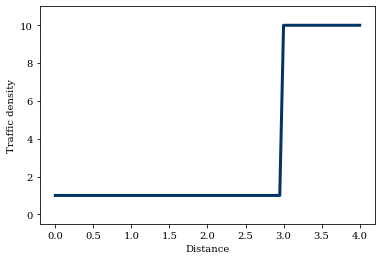

In [5]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

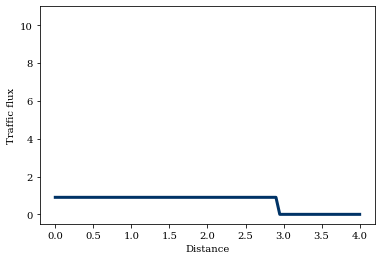

In [6]:
pyplot.plot(x, flux, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic flux')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

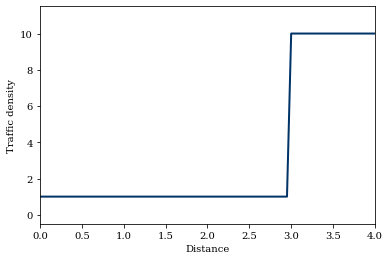

In [7]:
rho = rho_red_light(nx, rho_max, rho_in) 
rho_n = godunov(rho, nt, dt, dx, rho_max, u_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,11.5),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())

In [9]:
nx = 81
nt = 50
dx = 4.0/(nx-1)
x = numpy.linspace(0,4,nx)

rho_max = 10.
u_max = 1.
rho_light = 10.
rho_in = 1.

sigma = 1 #число куранта, если его уменьшать - возрастает численная вязкость
dt = sigma*dx/u_max

rho = rho_green_light(nx, rho_max)

flux = numpy.zeros_like(rho)
for i in range(len(rho)-1):
    flux[i] = godunov_traffic(u_max, rho_max, rho[i], rho[i+1])

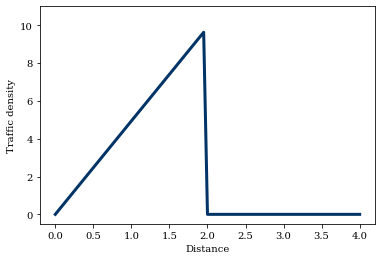

In [10]:
pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5,11.);

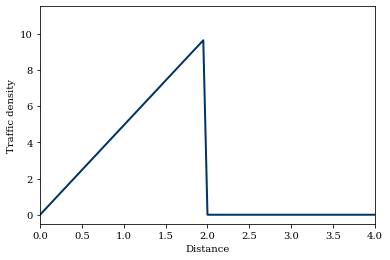

In [12]:
rho = rho_green_light(nx, rho_max)
rho_n = godunov(rho, nt, dt, dx, rho_max, u_max)

fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4),ylim=(-.5,11.5),xlabel=('Distance'),ylabel=('Traffic density'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=50)
HTML(anim.to_html5_video())